## Dominant Color Extraction for Image Segmentation
- ### Image Segmentation
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

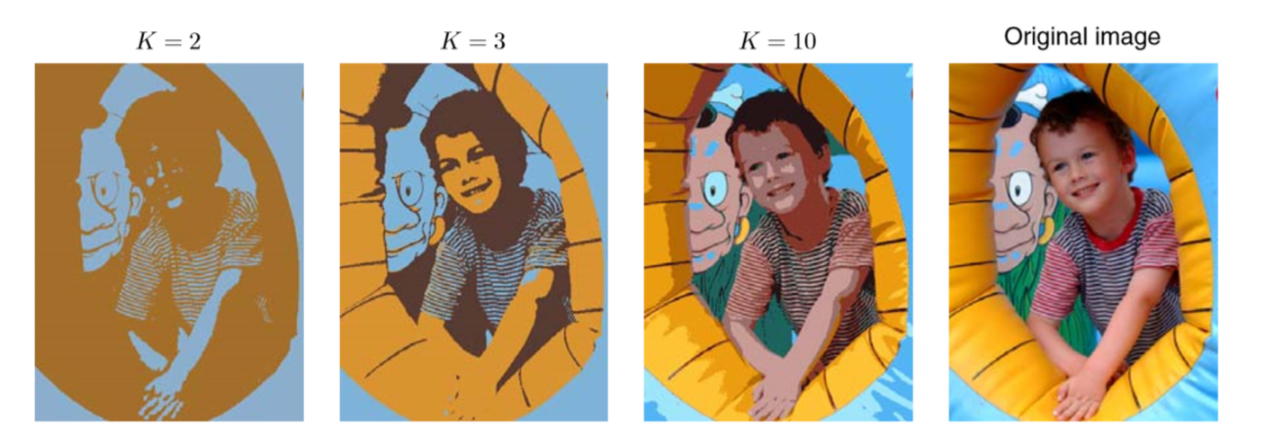

In [1]:
import matplotlib.pyplot as plt
import cv2

In [2]:
im =  cv2.imread('elephant.jpg') #Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


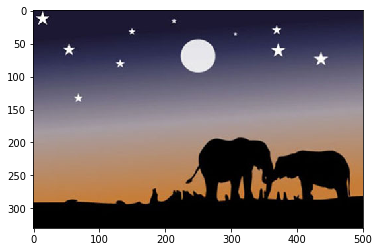

In [3]:
plt.imshow(im) # as RGB Format
plt.show()

In [5]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [11]:
from sklearn.cluster import KMeans
import numpy as np

In [12]:
dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
centers = km.cluster_centers_
print(centers)

[[ 98.69372544  94.85285947 117.87183223]
 [  1.49597475   0.83632573   1.15406   ]
 [174.77987421 145.24855346 128.25336478]
 [ 38.01014671  35.28635682  64.49065646]]


In [14]:
centers = np.array(centers,dtype='uint8') #To convert them in int
print(centers)

[[ 98  94 117]
 [  1   0   1]
 [174 145 128]
 [ 38  35  64]]


## Plot what all colors are these ?

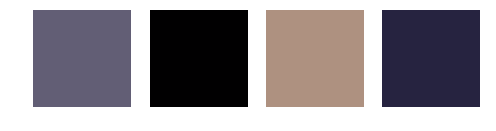

In [20]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

## Segmenting Our Original Image

In [21]:
new_img = np.zeros((330*500,3),dtype='uint8')

print(new_img.shape)

(165000, 3)


In [22]:
colors

[array([ 98,  94, 117], dtype=uint8),
 array([1, 0, 1], dtype=uint8),
 array([174, 145, 128], dtype=uint8),
 array([38, 35, 64], dtype=uint8)]

In [23]:
km.labels_

array([3, 3, 3, ..., 1, 1, 1])

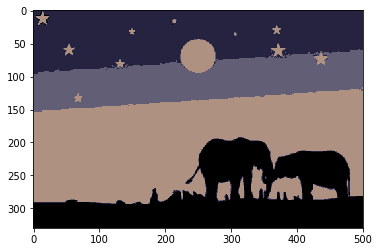

In [24]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()

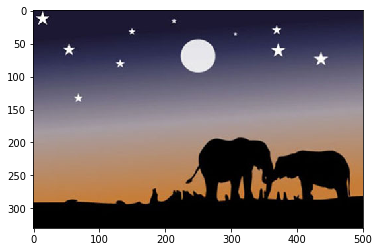

In [25]:
## Original
plt.imshow(im)
plt.show()